In [56]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import lmfit
from lmfit.models import LinearModel, LorentzianModel

In [57]:
def voigt1(x,s1,g1,o1):
    return scipy.special.voigt_profile(x+o,s1,g1)#+a*x**2+b
def voigt2(x,s1,s2,g1,g2,o1,o2,scale1,scale2):
    return scale1*scipy.special.voigt_profile(x-o1,s1,g1)+scale2*scipy.special.voigt_profile(x-o2,s2,g2)#+a*x**2+b

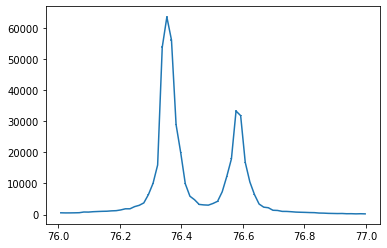

In [78]:
path =  'Data/Si331_40kV_40mA.xy'
with open(path) as tf:
    data = np.loadtxt(tf,delimiter=" ").T
datan=[[],[]]
for i in range(len(data[0])):
    if 76 < data[0,i] < 77:
        datan[0].append(data[0][i])
        datan[1].append(data[1][i])
data= datan
#Fehlerabschätzung
err = []
for i in range(len(data[1])):
    err.append((data[1][i])**0.5)

data.append(err)



plt.errorbar(data[0],data[1],yerr=data[2])
plt.show()

In [79]:
#modell erstellen
model_voigt = lmfit.model.Model(voigt2)  

#parameter erstellen
pars_voigt = model_voigt.make_params()


In [80]:
#Parameter Optimieren

pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["s2"].set(value=0.0147,min=0,max=1)
pars_voigt["g2"].set(value=0.0147,min=0,max=1)
#pars_voigt["a"].set(0.1)
#pars_voigt["b"].set(20)
pars_voigt["o1"].set(value=76.3567,min=76.2,max=76.4)
pars_voigt["o2"].set(value=76.5841,min=76.5,max=76.7)
pars_voigt["scale1"].set(4281.7826)
pars_voigt["scale2"].set(2198.0673)

[[Model]]
    Model(voigt2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 96
    # data points      = 67
    # variables        = 8
    chi-square         = 1.5887e+08
    reduced chi-square = 2692751.14
    Akaike info crit   = 999.487558
    Bayesian info crit = 1017.12510
[[Variables]]
    s1:      0.01301393 +/- 0.00193791 (14.89%) (init = 0.0137)
    s2:      9.6042e-07 +/- 30.4202779 (3167391978.87%) (init = 0.0147)
    g1:      0.01581510 +/- 0.00205489 (12.99%) (init = 0.0137)
    g2:      0.02329592 +/- 0.00367938 (15.79%) (init = 0.0147)
    o1:      76.3551627 +/- 5.1471e-04 (0.00%) (init = 76.3567)
    o2:      76.5841188 +/- 9.7346e-04 (0.00%) (init = 76.5841)
    scale1:  4611.63920 +/- 143.585196 (3.11%) (init = 4281.783)
    scale2:  2568.50216 +/- 147.286121 (5.73%) (init = 2198.067)
[[Correlations]] (unreported correlations are < 0.100)
    C(s1, g1)         = -0.924
    C(s2, g2)         = 0.918
    C(g1, scale1)     = 0.823
    C(g2, s

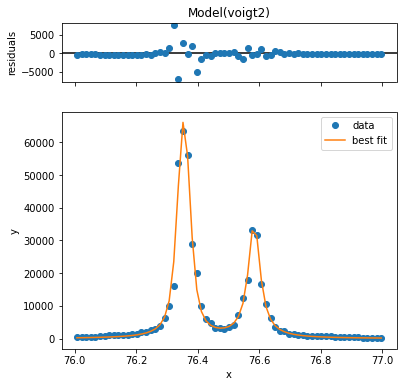

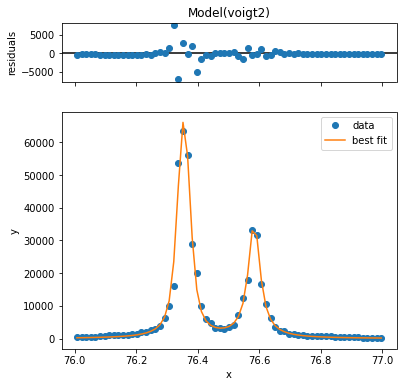

In [83]:
#Fitten
out_voigt = model_voigt.fit(data[1],x=data[0],params=pars_voigt,nan_policy='propagate')
print(out_voigt.fit_report())
out_voigt.plot()

#Parameter Optimieren
pars_voigt["s1"].set(0.007)
pars_voigt["g1"].set(0.003)
pars_voigt["s2"].set(0.007)
pars_voigt["g2"].set(0.00305058)
#pars_voigt["a"].set(0.1)
#pars_voigt["b"].set(20)
pars_voigt["o1"].set(-76.36)
pars_voigt["o2"].set(-76.6)

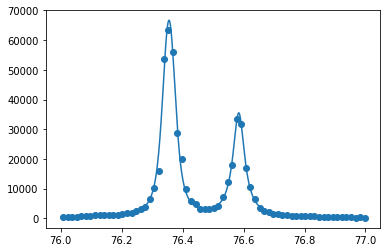

In [65]:
min,max,step = 76,77,0.001
data[1]=data[1]+np.full(len(data[1]),10)
plt.scatter(data[0],data[1])
plt.plot(np.arange(min,max,step),out_voigt.eval(x=np.arange(min,max,step)))
#plt.plot(np.arange(70,80,0.001),out_voigt.eval(x=np.arange(70,80,0.001)))